## Final Project Submission

Please fill out:
* Student name: Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:https://github.com/maysasaad/dsc-sklearn-preprocessing-lab


# Home's Sales prices

![images.jpg](data/image/images.jpg)

# Overview

In this project we'll perform a full linear regression analysis and report the findings of the final model, including both predictive model performance metrics and interpretation of fitted model parameters.

# Business Understanding
The goal of this project is to develop a pricing algorithm to help a real estate agency providing advice to homeowners or homebywers about how home renovations might increase the estimated value of their homes, and by what amount.

The main purpose of this algorithm is predictive, meaning that use multiple linear regression modeling to predict a good house's sales prices in a northwestern county.

The secondary purpose of this algorithm is inferential, meaning that the model should be able to tell us something about the relationship between the features of a home set and its price.

#  Data Understanding
This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder .

The dataset that I used included two types of variables  :

1-dependent variable (Home Prices).

2-Independent variable like (Number of bedrooms,Number of bathrooms, Number of floors in house ,condition,grade,ext)

# Data Preparation

## Importing the dataset
Let's start by importing the dataset kc_house_data  from csv file into a pandas dataframe using pandas read_csv().

In [692]:
# import some libraries for read and visualize data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [693]:
# Loading data from csv file  to a data frame
# Display the top five rows of the data frame by using .head() method

house = pd.read_csv('data/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


House data frame contains 21 columns , we will pick some of them for our analizing.

In [820]:
house.price.min()

78000.0

##### Drop Irrelevant Columns
For the purposes of this lab, we will only be using a subset of all of the features present in the  House dataset. In this step you will drop all irrelevant columns.

In [694]:
# Drop some columns from our data frame
# Display the top 5 rows by using .head() method
house = house.drop(columns=["id","date","view","sqft_above","sqft_basement","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


#### Variable Descriptions
Variable Descriptions Look in data_description.txt for a full description of all variables.

A preview of some of the columns: *id` - Unique identifier for a house

date - Date house was sold

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other condition - How good the overall condition of the house is. Related to maintenance of house.

grade` - Overall grade of the house. Related to the construction and design of the house.

sqft_above - Square footage of house apart from basement

sqft_basement - Square footage of the basement

yr_built - Year when house was built

yr_renovated - Year when house was renovated

zipcode - ZIP Code used by the United States Postal Service

lat - Latitude coordinate

long - Longitude coordinate

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Some more information about the features of this dataset by using .info() method:

In [695]:
# Getting a summary for house data frame 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


Let's use the describe() function which  is used to generate descriptive statistics that summarize the central tendency

In [696]:
# Display the house data frame statistic by using .describe() method
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000


#### Dealing with Categorical Variables 
categorical variable: does not represent a continuous number but refers to a classification information instead of numerical features.We have some columns like (floors,bedrooms,bathrooms) refer to classification information even thier datatypes refer to numeric feature so  we will convert thier datatypes to object.

In [697]:
# convert the data type of the column floors to object by using .astype() method.
house["floors"] = house["floors"].astype("str")

In [698]:
# Check the floors column data type by using .dtype
house["floors"].dtype

dtype('O')

In [699]:
# convert the data type of the column bedrooms to object by using .astype() method
house["bedrooms"] = house["bedrooms"].astype("str")

In [700]:
# convert the data type of the column bathrooms to object by using .astype() method
house["bathrooms"] = house["bathrooms"].astype("str")

In [701]:
#Extract Catagorical Variables
categoricals = house.select_dtypes(include=object)
categoricals.head()

,bedrooms,bathrooms,floors,waterfront,condition,grade
0,3,1.0,1.0,NaN,Average,7 Average
1,3,2.25,2.0,NO,Average,7 Average
2,2,1.0,1.0,NO,Average,6 Low Average
3,4,3.0,1.0,NO,Very Good,7 Average
4,3,2.0,1.0,NO,Average,8 Good


##### Handle Missing Values
Often for reasons outside of a data scientist's control, datasets are missing some values. In this step you will assess the presence of NaN values in our subset of data.Let's check for unique values for categoricals and if there any null values .

In [702]:
# Column Values and Null Counts:
# print .value_counts() for each column in obj_df
for column in categoricals.columns:
    print(f"COLUMN: '{column}'")
    print(f"Number of unique values: {len(categoricals[column].unique())}")
    print(f"Number of nulls: {categoricals[column].isnull().sum()}")
    print(categoricals[column].value_counts())
    print()

COLUMN: 'bedrooms'
Number of unique values: 12
Number of nulls: 0
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

COLUMN: 'bathrooms'
Number of unique values: 29
Number of nulls: 0
2.5     5377
1.0     3851
1.75    3048
2.25    2047
2.0     1930
1.5     1445
2.75    1185
3.0      753
3.5      731
3.25     589
3.75     155
4.0      136
4.5      100
4.25      79
0.75      71
4.75      23
5.0       21
5.25      13
5.5       10
1.25       9
6.0        6
0.5        4
5.75       4
6.5        2
6.75       2
8.0        2
6.25       2
7.5        1
7.75       1
Name: bathrooms, dtype: int64

COLUMN: 'floors'
Number of unique values: 6
Number of nulls: 0
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

COLUMN: 'waterfront'
Number of unique values: 3
Number of nulls: 2376
NO     19075
YES      146
Name: waterfront, dtype: int64



In [703]:
# Remove the null values by using .dropna()
categoricals.dropna()

,bedrooms,bathrooms,floors,waterfront,condition,grade
1,3,2.25,2.0,NO,Average,7 Average
2,2,1.0,1.0,NO,Average,6 Low Average
3,4,3.0,1.0,NO,Very Good,7 Average
4,3,2.0,1.0,NO,Average,8 Good
5,4,4.5,1.0,NO,Average,11 Excellent
...,...,...,...,...,...,...
21591,3,2.5,2.0,NO,Average,8 Good
21592,3,2.5,3.0,NO,Average,8 Good
21593,4,2.5,2.0,NO,Average,8 Good
21594,2,0.75,2.0,NO,Average,7 Average


Now , The categoricals dataframe is empty from null values.

In [704]:
# Distinguish between the continuous and categoricals Features
continuous = ['sqft_living','sqft_lot','yr_built','price']
categoricals = ['waterfront','grade','condition','bedrooms','bathrooms','floors']

#### Plot Categorical Variables
Now, pick 6 categorical variables and plot them against Price with a bar graph for each variable. All 6 bar graphs would be on the same figure.

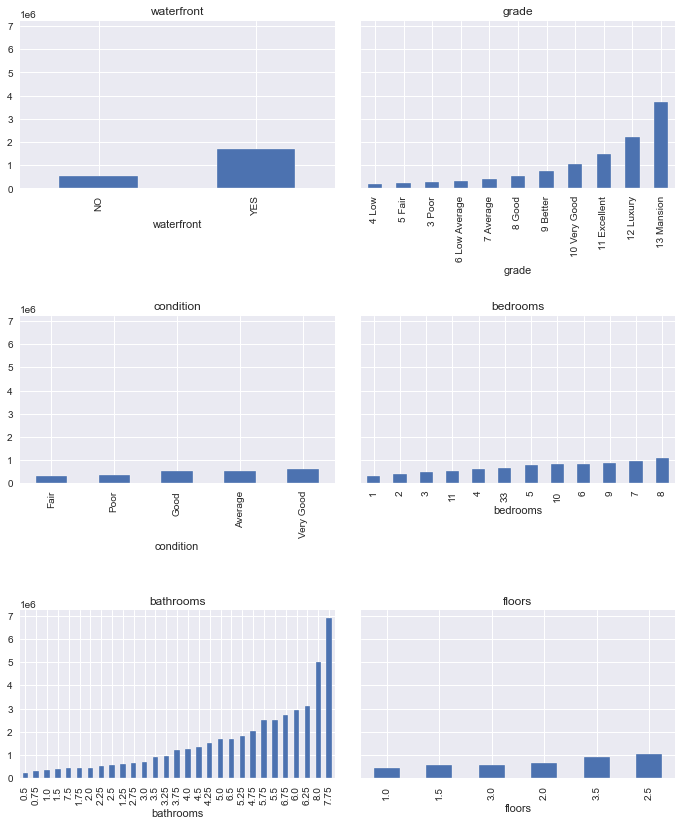

In [705]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12), sharey=True)

categoricals = ['waterfront','grade','condition','bedrooms','bathrooms','floors']

for col, ax in zip(categoricals, axes.flatten()):
    (house.groupby(col)               # group values together by column of interest
         .mean()['price']       # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

##### Convert Categorical Features into Numbers
A built-in assumption of the scikit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise you will get a ValueError when you try to fit a model. In this step you will use an OrdinalEncoder to replace data within individual non-numeric columns with 0s and 1s, and a OneHotEncoder to replace columns containing more than 2 categories with multiple "dummy" columns containing 0s and 1s.

At this point, a scikit-learn model should be able to run without errors!

#### Create dummy variables
Create dummy variables for the categorical features you chose remembering to drop the first. Drop the categorical columns that you used, concat the dummy columns to our continuous variables and asign it to a new variable

In [706]:
# Create dummy variables for the categorical features
dummies = pd.get_dummies(house[categoricals], prefix=categoricals, drop_first=True)
dummies

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
21595,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [707]:
# Drop the categoricals variables from the house data frame
house_preprocessed = house.drop(['waterfront','grade','condition','bedrooms','bathrooms','floors'], axis=1)

#### Combine Categorical and Continuous Features
Finally,we want to concatenate the new dataframe together with the original house_preprocessed.

In [708]:
# Join the dummies data frame and house_preprocessed
# Display the five top rows by using .head method.
house_preprocessed = pd.concat([house_preprocessed,dummies],axis=1)
house_preprocessed.head()

,price,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,221900.0,1180,5650,1955,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2570,7242,1951,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,180000.0,770,10000,1933,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,5000,1965,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1680,8080,1987,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ok, everything is numeric now! We have completed the minimum necessary preprocessing to use these features in a model!

## Modeling

#### Perform a Train-Test Split
Use train_test_split with the default split size. At the end you should have X_train, X_test, y_train, and y_test variables, where y represents Price and X represents all other columns.

In [709]:
from sklearn.model_selection import train_test_split

The prediction target for this analysis is the price of the home, so we separate the data into X and y accordingly:

In [710]:
X = house_preprocessed.drop(columns=["price"],axis=1)
y = house_preprocessed["price"]

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [711]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Prepare Both Sets for Modeling

In [712]:
# Display the five top rows of X_train by using .head method.
X_train.head()

,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
6243,1440,4855,1972,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8986,1430,9857,1980,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,3120,5000,2010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10155,2060,6958,1974,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,2500,4080,1922,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [713]:
X_train.isna().sum()

sqft_living           0
sqft_lot              0
yr_built              0
waterfront_YES        0
grade_11 Excellent    0
                     ..
floors_1.5            0
floors_2.0            0
floors_2.5            0
floors_3.0            0
floors_3.5            0
Length: 62, dtype: int64

In [714]:
# Check the shape of the X_train data frame by using .shape
X_train.shape

(17277, 62)

X_train is a DataFrame with  17277 rows and 62 columns.

In [715]:
# Display the five top rows of X_test by using .head method.
X_test.head()

,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
3686,850,8573,1945,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10247,1510,6083,1940,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,1790,42000,1983,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,1140,2500,1988,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,1500,3920,1947,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [716]:
# Check the shape of the X_test data frame by using .shape
X_test.shape

(4320, 62)

X_test is a DataFrame with 4320 rows and 36 columns.

#### Continuous Features
Lets take a look on the both X_train and X_test datasets and extract the continuous Features.

In [717]:
# Continuous Features
continuous = ["sqft_living","yr_built","sqft_lot"]

In [718]:
# Continuous Features for each X_train and  X_test datasets.
X_train_cont = X_train[continuous] 
X_test_cont = X_test[continuous]

#### A visualization of the distribution of the target variable:
let's take a look on the target distribution by using histogram.

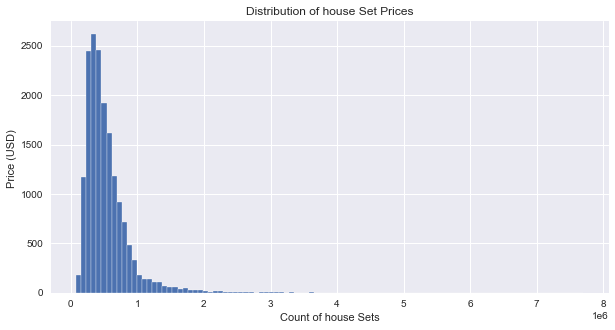

In [719]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Count of house Sets")
ax.set_ylabel("Price (USD) ")
ax.set_title("Distribution of house Set Prices");

We can notice that the distribution of the target (price) is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.

## Modeling

### 1. Baseline Model
For bulding the Baseline Model we need to discover which feature from the X_train data set has the highest colinearity with the target,We can do that by using heat map for continious variables.

In [720]:
# Display continious variable of X_train dataset.
X_train_cont

,sqft_living,yr_built,sqft_lot
6243,1440,1972,4855
8986,1430,1980,9857
9419,3120,2010,5000
10155,2060,1974,6958
10436,2500,1922,4080
...,...,...,...
11964,2230,2004,5800
21575,2770,2014,3852
5390,1530,1976,9000
860,380,1963,15000


#### Heat map for continious variables

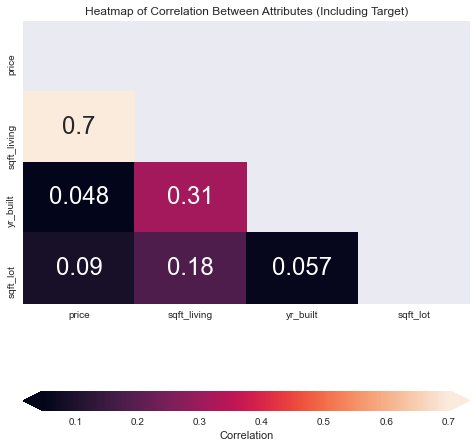

In [721]:
# Create a df with the target as the first column,
# then compute the correlation matrix

heatmap_data = pd.concat([y_train,X_train_cont], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


Based on the plot above,The  most strongly feater correlated with the target (price)is Square footage of living space in the home.   

In [722]:
most_correlated_feature = "sqft_living"

Let's make a scatter plot to check linearity between the Square footage of living space in the home

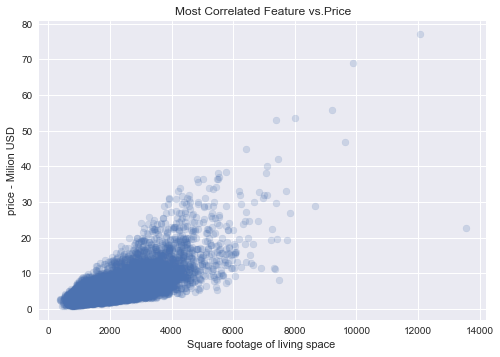

In [723]:
# create a scatter plot 
fig, ax = plt.subplots()
#perfect_line = np.arange(y_train.min(), y_train.max())
#ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(X_train[most_correlated_feature],y_train/100000, alpha=0.2)
ax.set_xlabel("Square footage of living space ")
ax.set_ylabel("price - Milion USD")
ax.set_title("Most Correlated Feature vs.Price");

clear linear relationship between the Square footage of living space feature and the target (price).

#### Building a Baseline Model
Now, we'll build a linear regression model using just the Square footage of living feature, which will serve as our baseline model, we will be using a LinearRegression model from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [724]:
from sklearn.linear_model import LinearRegression

#### Fit a Model
Fit a linear regression model on the training set

In [725]:
baseline_model = LinearRegression()

Let's use cross validation to take a look at the model's performance:

In [726]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

baseline_scores = cross_validate(
    estimator = baseline_model,
    X = X_train[[most_correlated_feature]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4906105322840632
Validation score: 0.4994294302788367


Because we are using the .score method of LinearRegression, these are r-squared scores.

That means that each of them represents the amount of variance of the target (price) that is explained by the model's feature ("Square footage of living") and parameters (intercept value and coefficient values for the features)

In general this seems like a fairly not strong model. It is getting nearly identtcal performance on training subsets compared to the validation subsets, explaining around 49% of variation explained by the relationship between the dependent variable (price) and the independent variable (Square footage of living space in the home.

### 2.Second model
Build a Model with All Numeric Features

##### Plot histograms with kde overlay to check the distribution of the predictors
Since there are so many features it is helpful to filter the columns by datatype and number of unique values.
We use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

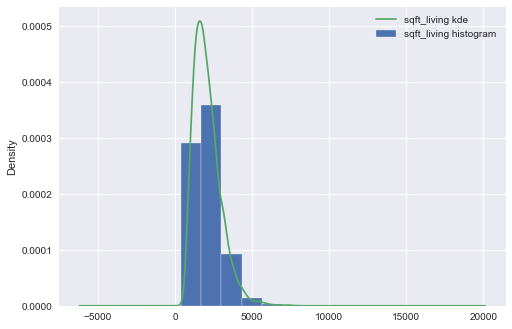

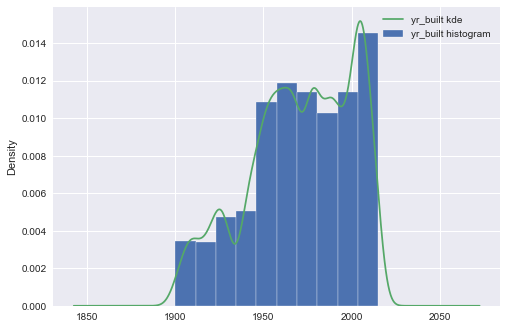

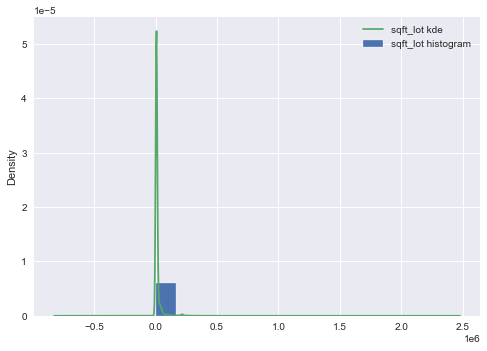

In [727]:
# For all the variables, check distribution by creating a histogram with kde

for column in X_train[continuous] :
    X_train[continuous][column].plot.hist(density=True, label = column+' histogram')
    X_train[continuous][column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Now we can look at scatter plots of all continious features compared to the target for X_train :

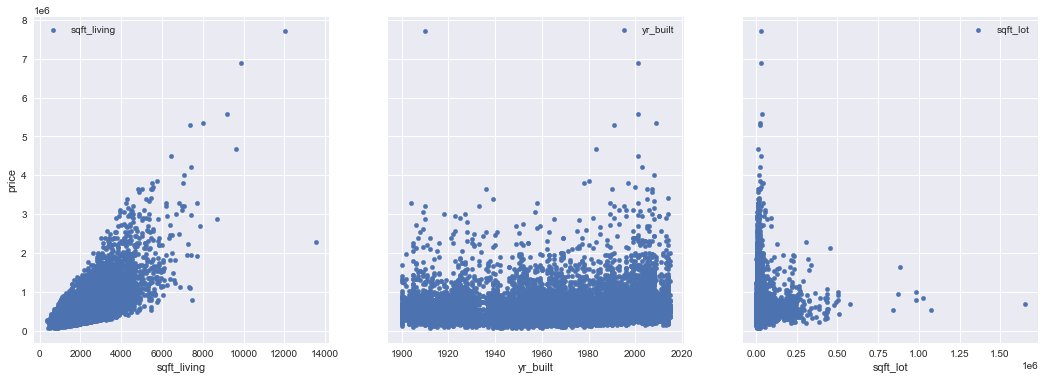

In [728]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
scatterplot_data = pd.concat([X_train_cont, y_train],axis = 1)

for idx, feature in enumerate(X_train_cont):
    scatterplot_data.plot(kind='scatter', x=feature, y='price', ax=axs[idx], label=feature)
plt.legend()
plt.show()

A linear pattern shows on sqft_lot .
yr_built is worse, there is too much variance along the y-axis and there's no clear linear relationship between yr_built and price.So we need to remove the yerar bulit feature from both X_train and x_test data sets.

In [729]:
# Drop yr_built column from X_train using .drop() method
# Display the top five rows of X_train_second_model data frame
X_train_second_model = X_train.drop(["yr_built"],axis = 1)
X_train_second_model.head()

,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
6243,1440,4855,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8986,1430,9857,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,3120,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10155,2060,6958,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,2500,4080,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [730]:
# Drop yr_built column from X_test_numeric using .drop() method
# Display the top five rows of X_test_second_model data frame
X_test = X_test.drop(["yr_built"],axis = 1)
X_test.head()

,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
3686,850,8573,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10247,1510,6083,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4037,1790,42000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,1140,2500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,1500,3920,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Building and Evaluating the Second Model
In the cell below, we use the same process to evaluate a model using X_train_second_model .

#### Fit a Model
Fit a linear regression model on the training set

In [731]:
second_model = LinearRegression()

In [732]:
# Fit the second model on train data set
second_model.fit(X_train_second_model, y_train)

LinearRegression()

#### Calculate MSE
Calculate the mean squared error on the test set

In [733]:
from sklearn.metrics import mean_squared_error
y_hat_test = second_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

52962482991.80945

In [734]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator = second_model,
    X = X_train_second_model,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6693697001401578
Validation score: 0.6456135478594557

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


Our second model got better scores on the training data and Validation data

Now ,It is better to get a summary of the second model.By using statsmodels library.

In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model.

In [735]:
# import statsmodels library

import statsmodels.api as sm
import statsmodels.formula.api as smf
# create predictors
predictors = X_train_second_model
# create model intercept
X_int = sm.add_constant(X_train_second_model)
#  fit the ols model
model2 = sm.OLS(y_train,X_int).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     588.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:03:41   Log-Likelihood:            -2.3644e+05
No. Observations:               17277   AIC:                         4.730e+05
Df Residuals:                   17217   BIC:                         4.735e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.158e+05   1.08e+05      4.769      0.000    3.04e+05    7.28e+05
sqft_living           152.6574      3.872     39.431      0.000     145.069     160.246
sqft_lot               -0.4109      0.041     -9.918      0.000      -0.492      -0.330
waterfront_YES       7.349e+05      2e+04     36.687      0.000    6.96e+05    7.74e+05
grade_11 Excellent    2.35e+05   1.44e+04     16.282      0.000    2.07e+05    2.63e+05
grade_12 Luxury      5.886e+05    2.8e+04     21.019      0.000    5.34e+05    6.44e+05
grade_13 Mansion     1.786e+06   8.01e+04     22.282      0.000    1.63e+06    1.94e+06
grade_3 Poor        -5.041e+05   2.15e+05     -2.340      0.019   -9.26e+05   -8.18e+04
grade_4 Low         -5.059e+05   5.21e+04     -9.712      0.000   -6.08e+05   -4.04e+05
grade_5 Fair        -5.151e+05   1.91e+04    -27.030      0.000   -5.52e+05   -4.78e+05
grade_6 Low Average -4.804e+05   1.17e+04    -41.040      0.000   -5.03e+05   -4.57e+05
grade_7 Average     -4.046e+05   9688.656    -41.762      0.000   -4.24e+05   -3.86e+05
grade_8 Good        -3.089e+05   8964.796    -34.454      0.000   -3.26e+05   -2.91e+05
grade_9 Better      -1.614e+05   8851.244    -18.232      0.000   -1.79e+05   -1.44e+05
condition_Fair       1888.4319   1.86e+04      0.102      0.919   -3.45e+04    3.83e+04
condition_Good        4.71e+04   3991.119     11.802      0.000    3.93e+04    5.49e+04
condition_Poor      -5984.9489   4.93e+04     -0.121      0.903   -1.03e+05    9.06e+04
condition_Very Good  1.288e+05   6294.826     20.463      0.000    1.16e+05    1.41e+05
bedrooms_10         -2.204e+05   1.56e+05     -1.416      0.157   -5.26e+05    8.47e+04
bedrooms_11         -1.123e+05   2.14e+05     -0.525      0.599   -5.31e+05    3.07e+05
bedrooms_2          -4393.6461   1.81e+04     -0.243      0.808   -3.99e+04    3.11e+04
bedrooms_3          -6.481e+04   1.81e+04     -3.584      0.000      -1e+05   -2.94e+04
bedrooms_33         -1.429e-09   6.62e-10     -2.157      0.031   -2.73e-09   -1.31e-10
bedrooms_4          -8.547e+04   1.85e+04     -4.630      0.000   -1.22e+05   -4.93e+04
bedrooms_5          -8.633e+04   1.95e+04     -4.434      0.000   -1.24e+05   -4.82e+04
bedrooms_6            -9.6e+04   2.39e+04     -4.021      0.000   -1.43e+05   -4.92e+04
bedrooms_7          -1.879e+05   4.16e+04     -4.519      0.000   -2.69e+05   -1.06e+05
bedrooms_8           -6.49e+04   7.08e+04     -0.916      0.360   -2.04e+05    7.39e+04
bedrooms_9           5.423e+04   1.09e+05      0.498      0.619   -1.59e+05    2.68e+05
bathrooms_0.75       4.749e+04    1.1e+05      0.430      0.667   -1.69e+05    2.64e+05
bathrooms_1.0        8.973e+04   1.07e+05      0.842      0.400   -1.19e+05    2.99e+05
bathrooms_1.25       6.014e+04   1.43e+05      0.420      0.674    -2.2e+05    3.41e+05
bat

We can notice by the model summary there are strong multicollinearity among the features.

R squared refers to :In this model around 67% of variation explained by the relationship between the dependent variable (price) and the independent variables .

In [736]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender

# the independent variables set
#X = X_train_second_model
# VIF dataframe
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns

# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  #for i in range(len(X.columns))]

#print(vif_data)

In [737]:
#vif_data

In [738]:
#vif_data.iloc[5:55]

##### Tornado Diagram

<AxesSubplot:>

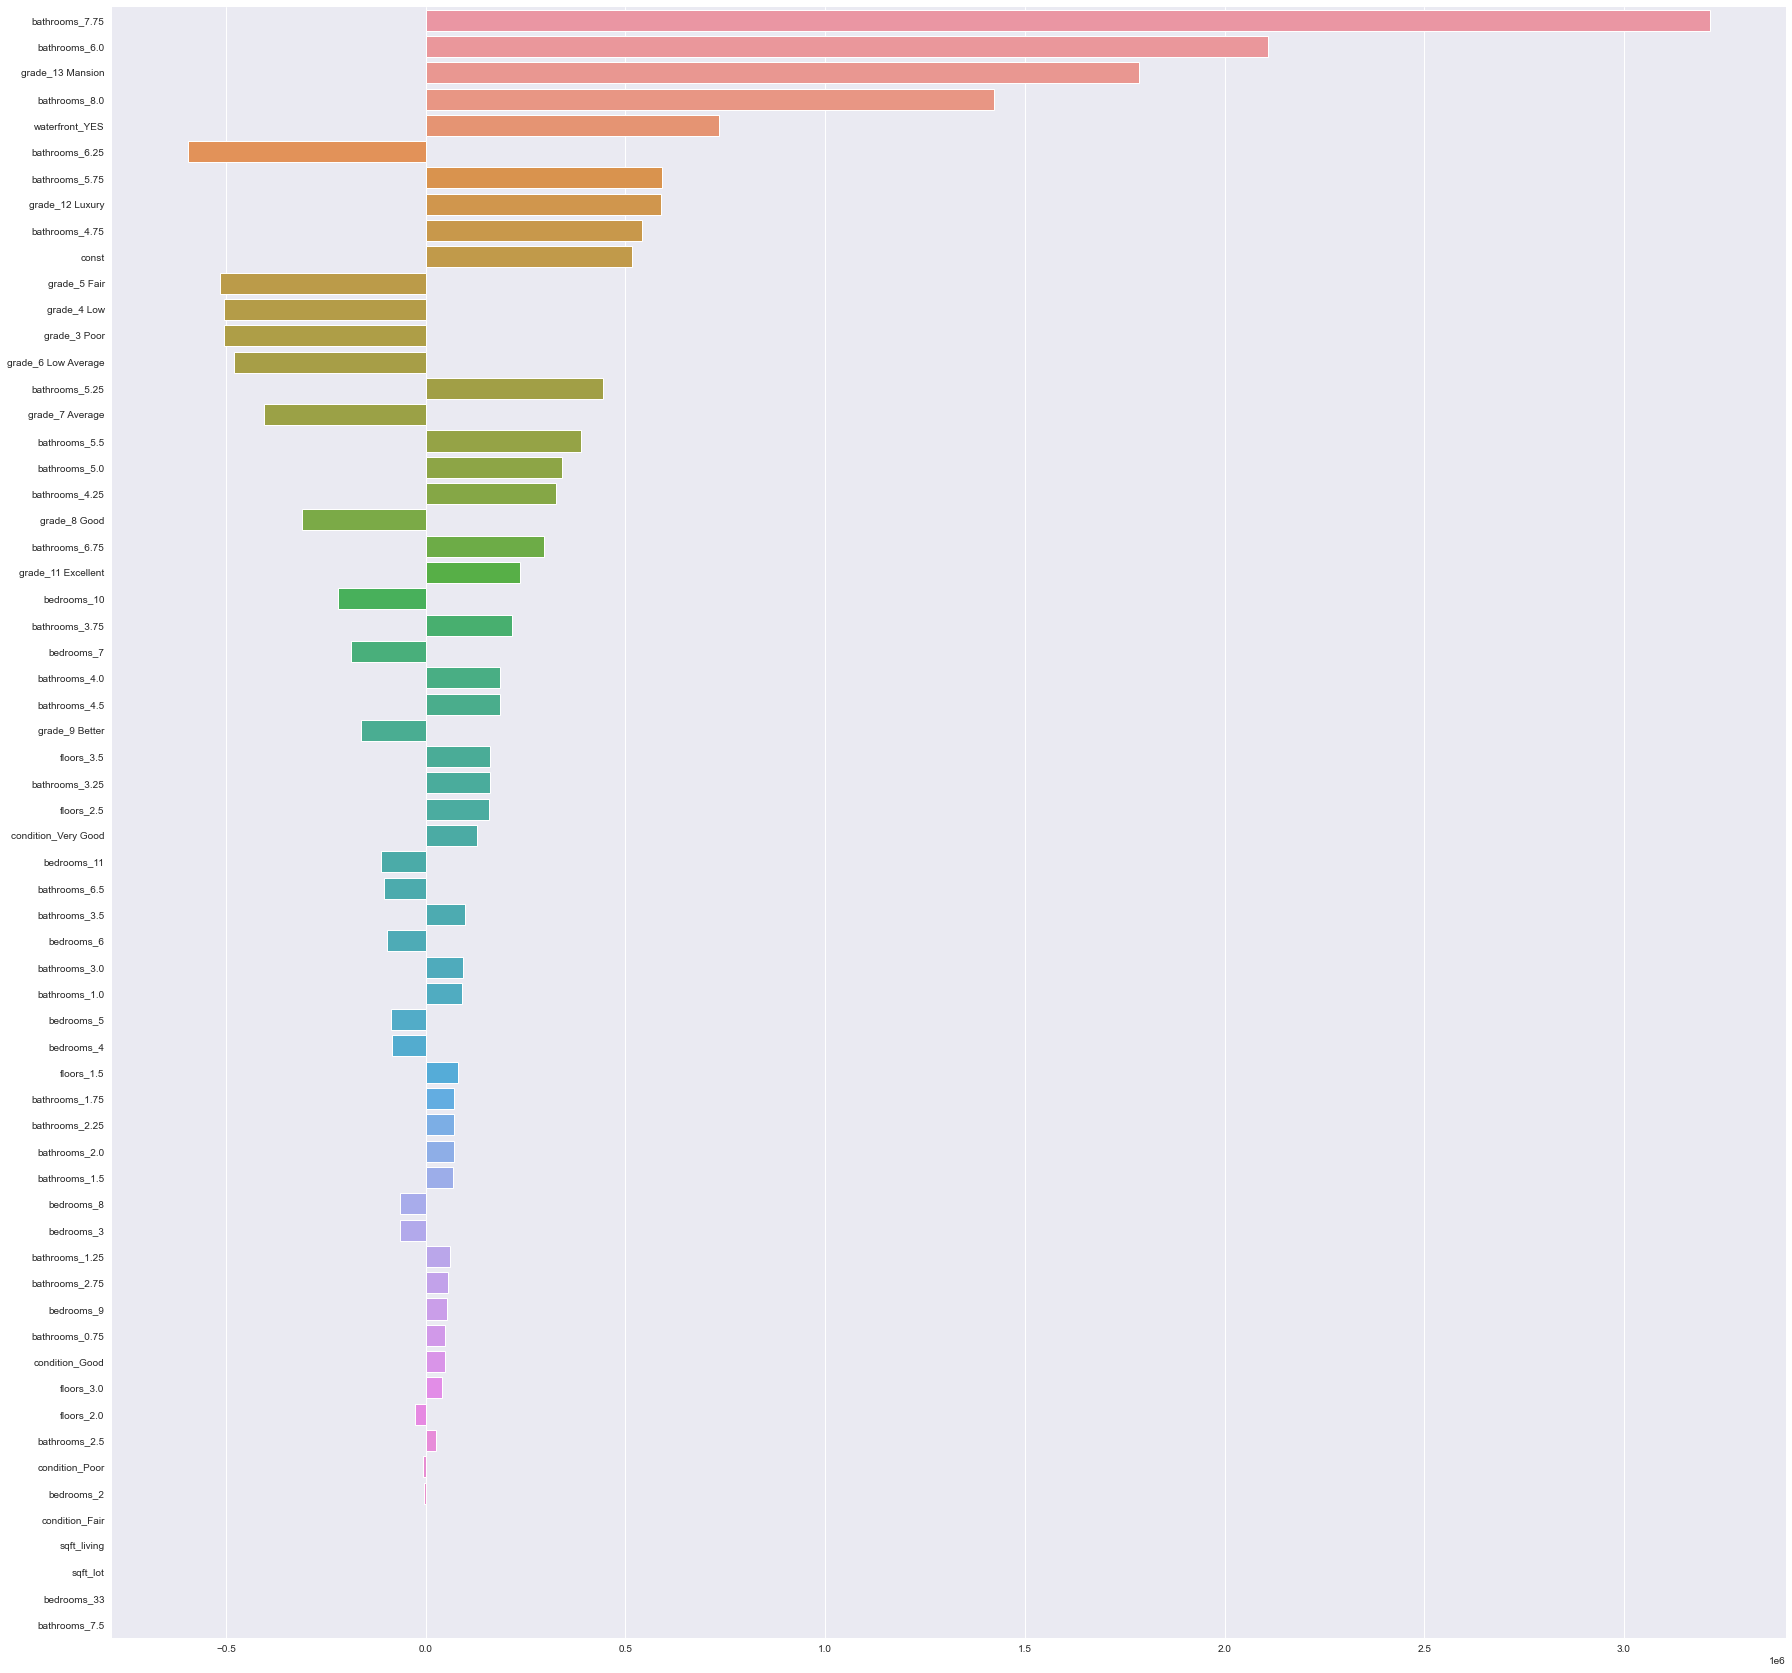

In [739]:
fig, ax = plt.subplots(figsize=(30,30))
sns.set(font_scale = 2)
coeff = model2.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x = coeff.values, y =coeff.index, orient='h')

###### Coefficients: 
The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the house pricing based on house feature.

The coefficient value helps us understand the marginal effect of the features on the dependent variable. Given a one-unit change in the feature variable when the other features are unchanged, how much is the dependent variable changed.

From the Tornado Diagram
The only trick to getting a tornado diagram is that the coefficients have to be sorted in descending order by the absolute value of the coefficient.
inform us if there is a positive or negative correlation between the features and target.

###### R-squared
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1.
In this case , the relationship between the dependent variable and the independent variables explains 66.6% of the variation in the data.


###### P>|t| or p-value
p-values for the t-test

Again we can compare the p-values, or likelihood that we would observe our data by random chance if our features had no statistically significant relationship to the charges variable. When we compare the p-values of our features with a significance threshold of 0.05individually, if:

𝑝 < .05 : Reject that there is no relationship between the features of our model and  the target (price)

𝑝 >= .05 : Accept the null hypothesis. There is no relationship between the features of our model and the target (price)

### Selecting Features

There are in general two reasons why feature selection is used:
1. Reducing the number of features, to reduce overfitting and improve the generalization of models.
2. To gain a better understanding of the features and their relationship to the response variables.

I will discuss using coefficients of regression models for selecting and interpreting features.

This is based on the idea that when all features are on the same scale, the most important features should have the highest coefficients in the model, while features uncorrelated with the output variables should have coefficient values close to zero.

##### 1.Based on p-values
Given that we suspect our model's issues are related to multicollinearity, let's try to narrow down those features. In this case, let's use the p-values assigned to the coefficients of the model.

(condition_Fair,condition_Poor,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_8,bedrooms_9
bathrooms_0.75 ,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0
bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,
bathrooms_4.0,bathrooms_4.5,bathrooms_6.5,bathrooms_6.75) all these features are not significant that is mean there is no relationship between the price and these features.

In [740]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
sqft_lot: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_3 Poor: False
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Fair: False
condition_Good: True
condition_Poor: False
condition_Very Good: True
bedrooms_10: False
bedrooms_11: False
bedrooms_2: False
bedrooms_3: True
bedrooms_33: False
bedrooms_4: True
bedrooms_5: True
bedrooms_6: False
bedrooms_7: False
bedrooms_8: False
bedrooms_9: False
bathrooms_0.75: False
bathrooms_1.0: False
bathrooms_1.25: False
bathrooms_1.5: False
bathrooms_1.75: False
bathrooms_2.0: False
bathrooms_2.25: False
bathrooms_2.5: True
bathrooms_2.75: False
bathrooms_3.0: False
bathrooms_3.25: False
bathrooms_3.5: False
bathrooms_3.75: False
bathrooms_4.0: False
bathrooms_4.25: False
bathrooms_4.5: False
bathrooms_4.75: False
bathrooms_5.0: False
bathrooms_5.25: False
bathrooms

In [741]:
# collect the bad features.
#bad_features = ["condition_Fair","condition_Poor","bedrooms_10","bedrooms_11",
                #"bedrooms_2","bedrooms_8","bedrooms_9","bathrooms_0.75","bathrooms_1.0"
                #,"bathrooms_1.25","bathrooms_1.5","bathrooms_1.75","bathrooms_2.0",
                #"bathrooms_2.25","bathrooms_2.5","bathrooms_2.75","bathrooms_3.0",
                #"bathrooms_3.25","bathrooms_3.5","bathrooms_4.0","bathrooms_4.5"
                #,"bathrooms_6.5","bathrooms_6.75"]

In [742]:
bad_feature = ["grade_3 Poor","condition_Fair","condition_Poor","bedrooms_10",
                "bedrooms_11","bedrooms_2","bedrooms_33","bedrooms_6",
               "bedrooms_7","bedrooms_8","bedrooms_9","bathrooms_0.75",
               "bathrooms_1.0","bathrooms_1.25","bathrooms_1.5",
               "bathrooms_1.75","bathrooms_2.0","bathrooms_2.25",
               "bathrooms_2.75","bathrooms_3.0","bathrooms_3.25","bathrooms_3.5",
               "bathrooms_3.75","bathrooms_4.0","bathrooms_4.25","bathrooms_4.5",
                "bathrooms_4.75","bathrooms_5.0","bathrooms_5.25","bathrooms_5.5",
                "bathrooms_5.75","bathrooms_6.25","bathrooms_6.5","bathrooms_6.75",
                 "bathrooms_7.5","bathrooms_8.0","floors_3.0","floors_3.5" ]              

In [743]:
# Drop the bad features from X_train_second_model
# Display the top five rows of  X_train_second_model
X_train_second_model = X_train_second_model.drop(X_train_second_model[bad_feature],axis = 1)
X_train_second_model.head()

,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,...,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,bathrooms_7.75,floors_1.5,floors_2.0,floors_2.5
6243,1440,4855,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8986,1430,9857,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9419,3120,5000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10155,2060,6958,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
10436,2500,4080,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [744]:
# Drop the bad features from X_train_second_model
# Display the top five rows of  X_train_second_model
#X_train_second_model = X_train_second_model.drop(X_train_second_model[bad_features],axis = 1)
#X_train_second_model.head()

In [745]:
#X_test.columns


In [746]:
# Drop the bad features from X_test.
#X_test = X_test.drop(X_test[bad_features],axis = 1)

In [747]:
# Drop the bad features from X_test.
X_test = X_test.drop(X_test[bad_feature],axis = 1)

Based on the p-value of the t-test, which feature has the least statistical influence on the dependent variable?

In [748]:
#fig = plt.figure(figsize=(16,20))
#fig = sm.graphics.plot_regress_exog(model2,"sqft_living", fig=fig)
#plt.show()

#### Investigating Multicollinearity and select feature based on VIF:
When there are multiple (linearly) correlated features (as is the case with very many real life datasets), the model becomes unstable, meaning that small changes in the data can cause large changes in the model (i.e. coefficient values), making model interpretation very difficult (called multicollinearity problem).
We need to discover which feature from the X_train second model data set has the highest colinearity with the target,We can do that by using heat map for continious variables.

In [749]:
# Create a df with the target as the first column,
# then compute the correlation matrix

#heatmap_data = pd.concat([y_train, X_train_second_model], axis=1)
#corr = heatmap_data.corr()

# Set up figure and axes
#fig, ax = plt.subplots(figsize=(50,50))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
#sns.heatmap(
    # Specifies the data to be plotted
    #data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    #mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    #ax=ax,
    # Specifies that we want labels, not just colors
    #annot=True,
    # Customizes colorbar appearance
    #cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

# Customize the plot appearance
#ax.set_title("Heatmap of Correlation Between Attributes (Including Target)",fontsize=30);


From the plot above we can not notice a high multicolinearity between the features.

Let's create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [750]:
#df =X_train_second_model.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#df['pairs'] = list(zip(df.level_0, df.level_1))

#df.set_index(['pairs'], inplace = True)

#df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
#df.columns = ['cc']

#df.drop_duplicates(inplace=True)

#df[(df.cc>.75) & (df.cc<1)]

We notice there is no multicolinearity between feaatures pairs

##### Investigating Multicollinearity based on vif
When there are multiple (linearly) correlated features (as is the case with very many real life datasets), the model becomes unstable, meaning that small changes in the data can cause large changes in the model (i.e. coefficient values), making model interpretation very difficult (so called multicollinearity problem). We need to discover which feature from the X_train second model data set has the highest colinearity with the target,We can do that by using heat map for continious variables.

In [751]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender

# the independent variables set
#X = X_train_second_model
# VIF dataframe
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns

# calculating VIF for each feature
#vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  #for i in range(len(X.columns))]

#print(vif_data)


In [752]:
#bad_features = ["condition_Poor","condition_Fair","bedrooms_10","bedrooms_11","bedrooms_2","bedrooms_8","bedrooms_9","bathrooms_0.75","bathrooms_1.0" ,"bathrooms_1.25","bathrooms_1.5","bathrooms_1.75","bathrooms_2.0","bathrooms_2.25","bathrooms_2.5","bathrooms_2.75","bathrooms_3.0","bathrooms_3.25","bathrooms_3.5","bathrooms_4.0","bathrooms_4.5","bathrooms_6.5","bathrooms_6.75"]

In [753]:
#bad_features = ["condition_Poor","condition_Fair","bedrooms_10","bedrooms_11","bedrooms_2","bedrooms_8","bedrooms_9","bathrooms_0.75","bathrooms_1.0" ,"bathrooms_1.25","bathrooms_1.5","bathrooms_1.75","bathrooms_2.0","bathrooms_2.25","bathrooms_2.5","bathrooms_2.75","bathrooms_3.0","bathrooms_3.25","bathrooms_3.5","bathrooms_4.0","bathrooms_4.5","bathrooms_6.5","bathrooms_6.75"]

In [754]:
#X_train_second_model_new = X_train_second_model.drop(X_train_second_model[bad_features]
                                                    #,axis=1)

In [755]:
#X_test = X_test.drop(X_test[bad_features],axis=1)

In [756]:
#X_train_third_model = X_train_second_model_new.drop(columns = ["bedrooms_4","bedrooms_3"],axis = 1)
#X_train_third_model.head()

In [757]:
#X_test = X_test.drop(columns =["bedrooms_4","bedrooms_3"] ,axis = 1)

In [758]:
# Create a df with the target as the first column,
# then compute the correlation matrix

#heatmap_data = pd.concat([y_train, X_train_second_model_new], axis=1)
#corr = heatmap_data.corr()

# Set up figure and axes
#fig, ax = plt.subplots(figsize=(16,32))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
#sns.heatmap(
    # Specifies the data to be plotted
    #data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    #mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    #ax=ax,
    # Specifies that we want labels, not just colors
   # annot=True,
    # Customizes colorbar appearance
    #cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

# Customize the plot appearance
#ax.set_title("Heatmap of Correlation Between Attributes (Including Target)",fontsize=30);


### Model3 :

Now ,after we  removed the features that thier p values not significant.Let's build the third model.

In [759]:
#X_train_third_model = X_train_second_model

In [760]:
X_train_third_model = X_train_second_model

In [761]:
# Check the shape of the X_train_third_model
#X_train_third_model.shape

In [762]:
# Check the shape of the X_train_third_model
X_train_third_model.shape

(17277, 23)

In [763]:
# Check the shape of the X_test_numeric
#X_test.shape

In [764]:
# Check the shape of the X_test_numeric
X_test.shape

(4320, 23)

Look at the histgrams for the continuous variables in X_train third model and X_test numeric datasets.

In [765]:
# create a histogram plots for X_train data set.
#import warnings
#warnings.filterwarnings('ignore')
#fig = plt.figure(figsize = (36,40))
#ax = fig.gca()
#X_train_third_model.hist(ax = ax);

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros.
Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

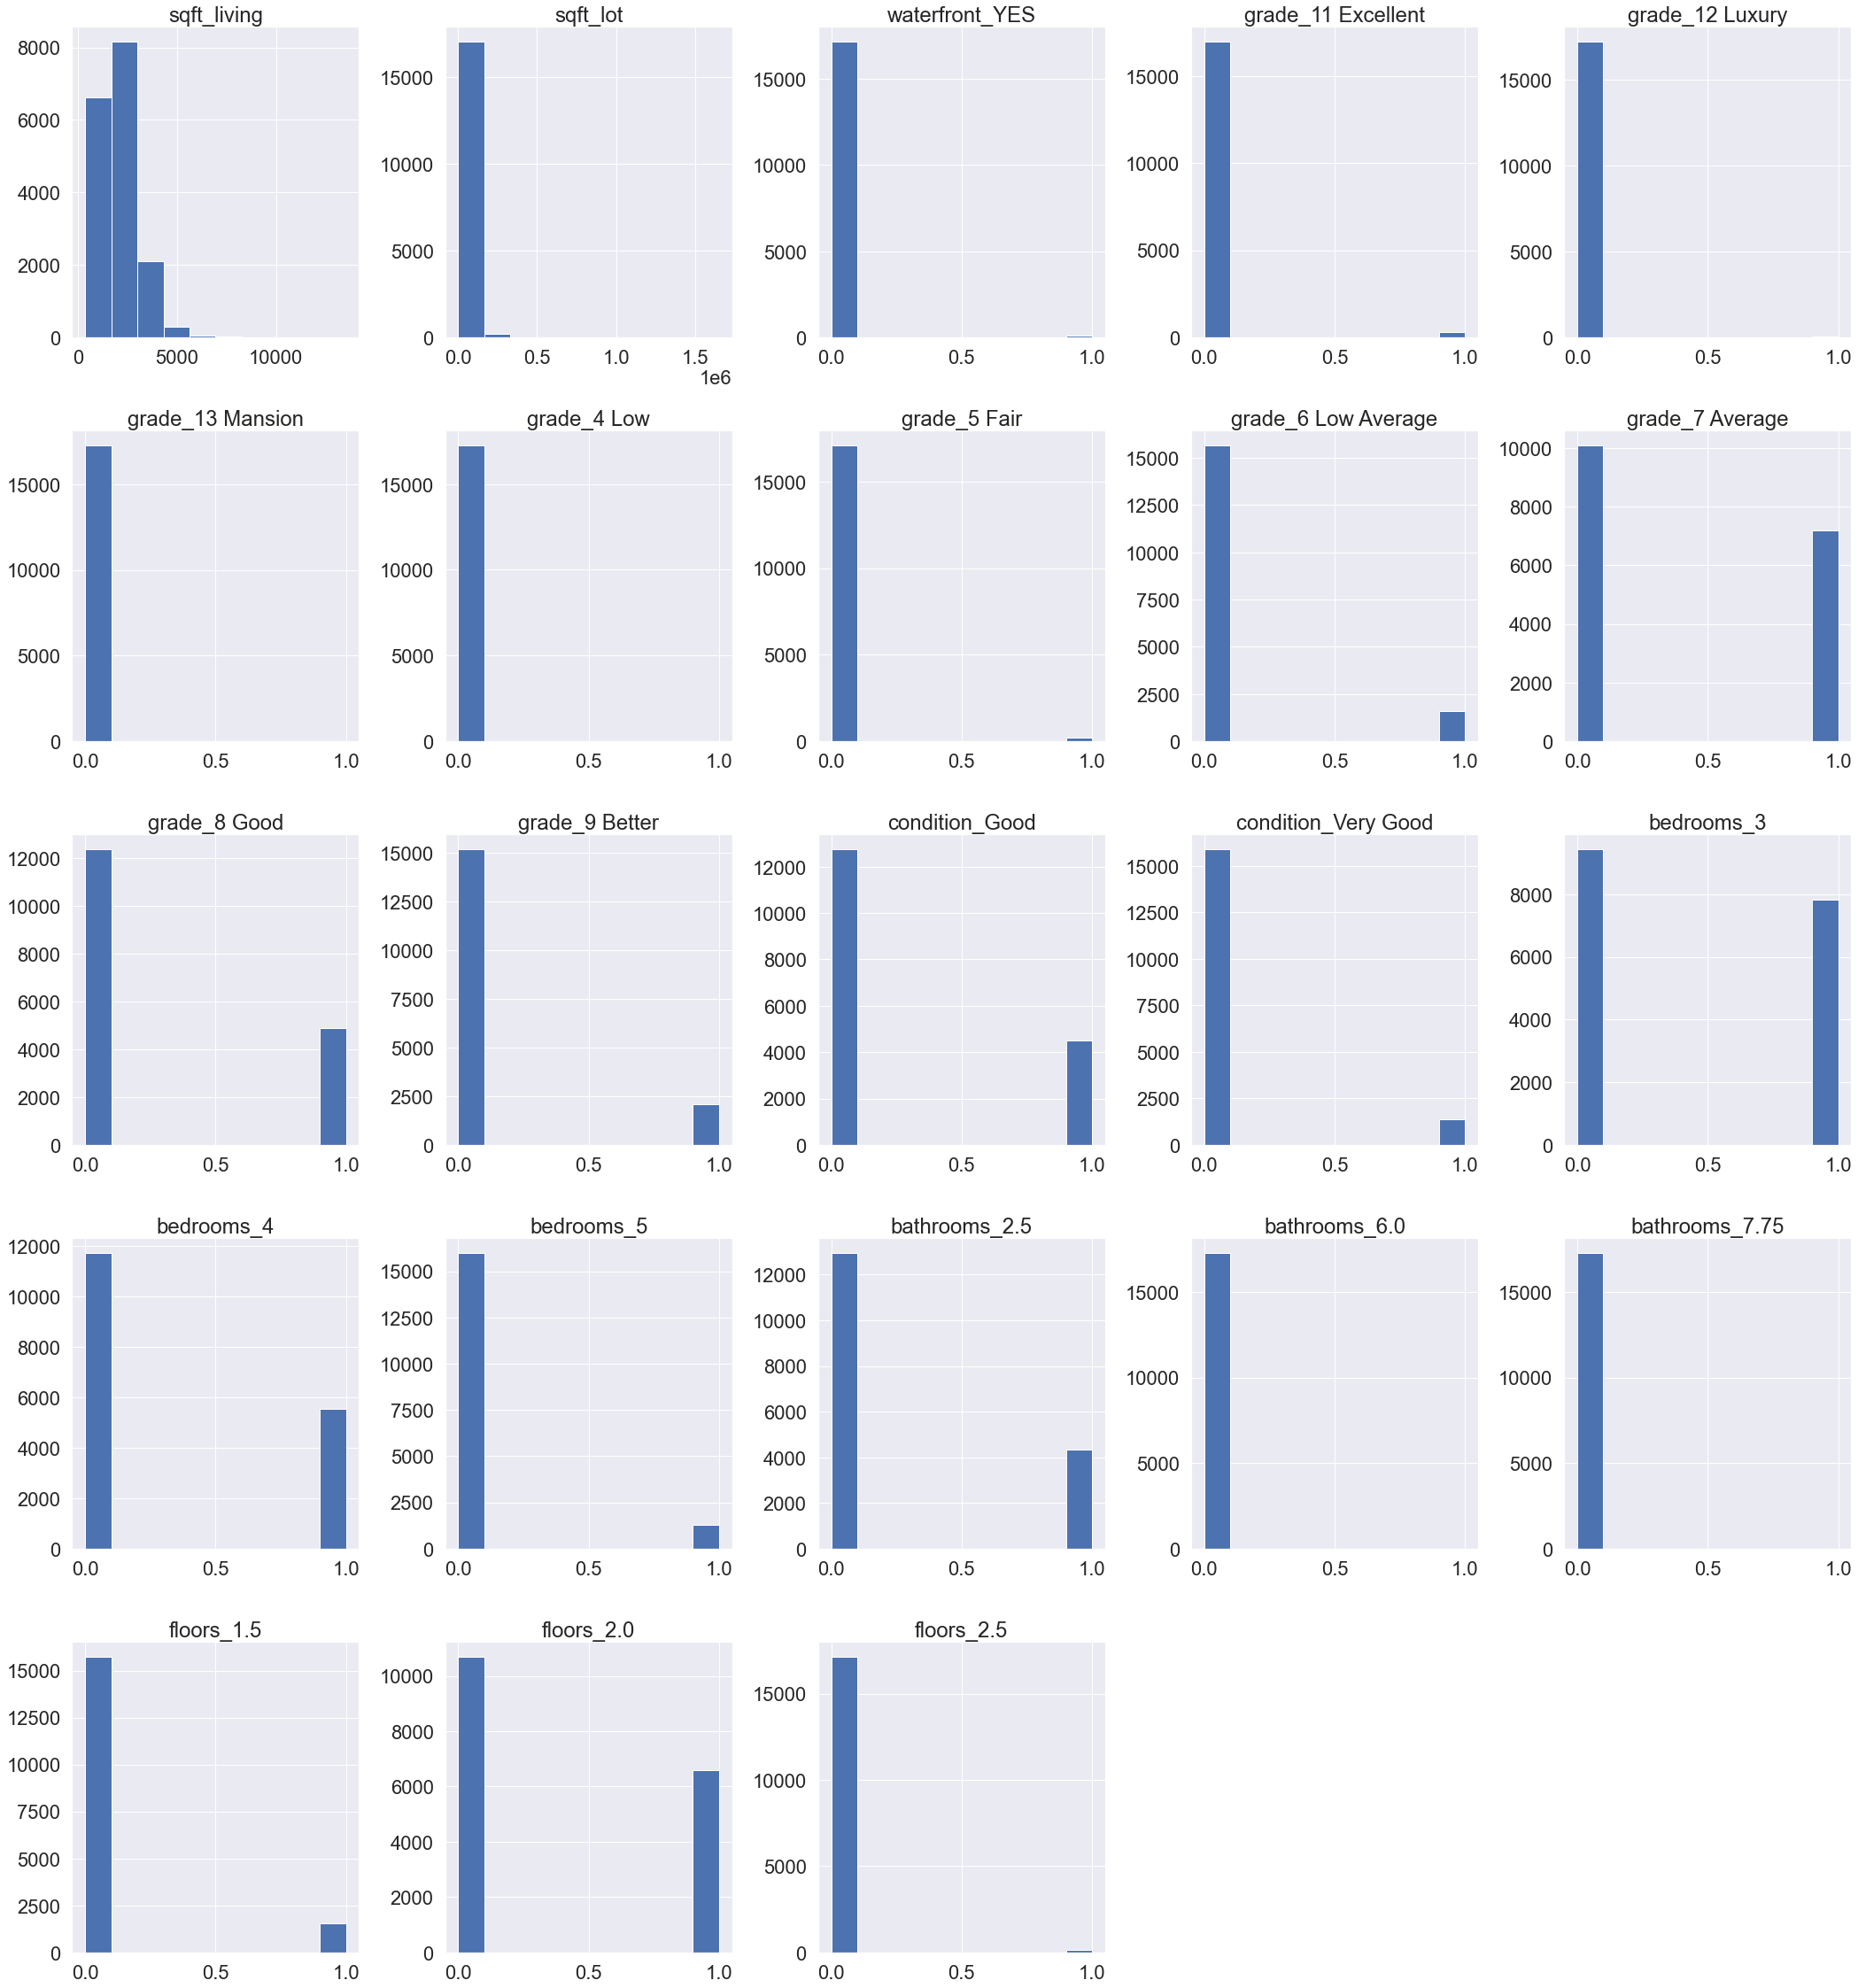

In [766]:
# create a histogram plots for X_train data set.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (36,40))
ax = fig.gca()
X_train_third_model.hist(ax = ax);

In [767]:
# Select the contiuous features from X_train third model data set.
#conts = ["sqft_living","sqft_lot"]
#X_train_third_model_conts = X_train_third_model[conts]

In [768]:
# Select the contiuous features from X_train third model data set.
conts = ["sqft_living","sqft_lot"]
X_train_third_model_conts = X_train_third_model[conts]

#### Perform log transformations for the variables where it makes sense
One common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact of the distribution.

In [769]:
# use numpy library 
#import numpy as np
# use log transformation to transforming Non-Normal Features
#log_names = [f'{column}_log' for column in X_train_third_model_conts.columns]

#X_train_log = np.log(X_train_third_model_conts)
#X_train_log.columns = log_names
#X_train_log.hist(figsize=(19, 5), bins='auto')
#fig.tight_layout();

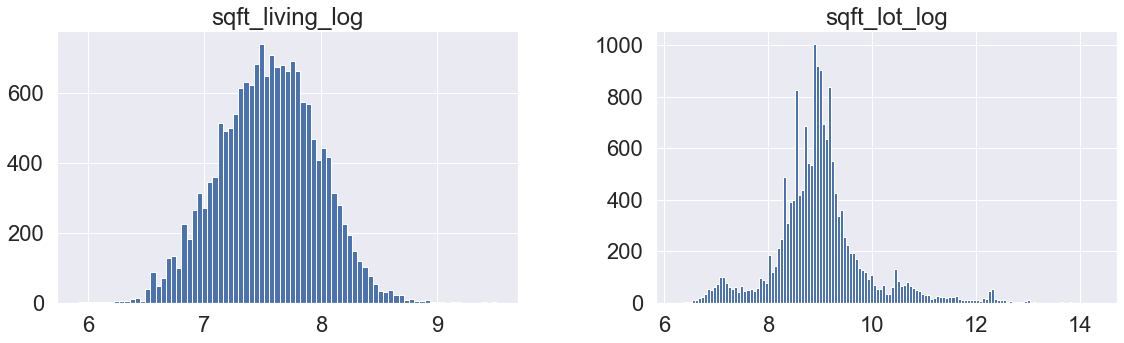

In [770]:
# use numpy library 
import numpy as np
# use log transformation to transforming Non-Normal Features
log_names = [f'{column}_log' for column in X_train_third_model_conts.columns]

X_train_log = np.log(X_train_third_model_conts)
X_train_log.columns = log_names
X_train_log.hist(figsize=(19, 5), bins='auto')
fig.tight_layout();

#### Feature Scaling and Normalization
This is because most machine learning algorithms use Euclidean distance between two data points in their computations. Because of that, making sure that features have similar scales is formally required there. Some algorithms even require features to be zero centric.

A good rule of thumb is, however, to check your features for normality, and while you're at it, scale your features so they have similar magnitudes

We will define a fuction 

In [771]:
# Create a function for normalize and scale the data set.
#def normalize(feature):
    #return (feature - feature.mean()) / feature.std()
# Apply the normalize function to the data set
#features_final = X_train_log.apply(normalize)
# create a histgram plot.
#features_final.hist(figsize  = [10, 5]);

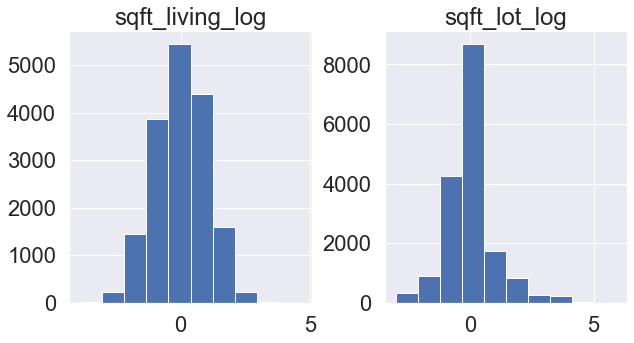

In [772]:
# Create a function for normalize and scale the data set.
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
# Apply the normalize function to the data set
features_final = X_train_log.apply(normalize)
# create a histgram plot.
features_final.hist(figsize  = [10, 5]);

Lets view  the continious features after scaling

In [773]:
# view the continious features after scaling
#features_final

In [774]:
# view the continious features after scaling
features_final

,sqft_living_log,sqft_lot_log
6243,-0.661437,-0.557527
8986,-0.677889,0.228192
9419,1.164030,-0.524875
10155,0.183934,-0.158236
10436,0.640979,-0.750483
...,...,...
11964,0.371147,-0.360203
21575,0.883110,-0.814284
5390,-0.518305,0.127275
860,-3.806766,0.694037


In [775]:
# remove the features before log and normalize
#X_train_third_model = X_train_third_model.drop(columns = ["sqft_living","sqft_lot"],axis = 1)
#X_train_third_model.head()

In [776]:
# remove the features before log and normalize
X_train_third_model = X_train_third_model.drop(columns = ["sqft_living","sqft_lot"],axis = 1)
X_train_third_model.head()

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,...,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,bathrooms_7.75,floors_1.5,floors_2.0,floors_2.5
6243,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
8986,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
9419,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
10155,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
10436,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0


We want to concatenate the new dataframe (features_final) together with the X_train for third model

In [777]:
# concat the X_train_third_model with final feature by using .concat()method.
#X_train_third_model = pd.concat([features_final,X_train_third_model],axis = 1)
#X_train_third_model.head()

In [778]:
# concat the X_train_third_model with final feature by using .concat()method.
X_train_third_model = pd.concat([features_final,X_train_third_model],axis = 1)
X_train_third_model.head()

,sqft_living_log,sqft_lot_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,...,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,bathrooms_7.75,floors_1.5,floors_2.0,floors_2.5
6243,-0.661437,-0.557527,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8986,-0.677889,0.228192,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9419,1.164030,-0.524875,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10155,0.183934,-0.158236,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
10436,0.640979,-0.750483,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [779]:
# view X_train columns
#X_train_third_model.columns

In [780]:
# view X_train columns
X_train_third_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bathrooms_2.5', 'bathrooms_6.0', 'bathrooms_7.75', 'floors_1.5',
       'floors_2.0', 'floors_2.5'],
      dtype='object')

<AxesSubplot:>

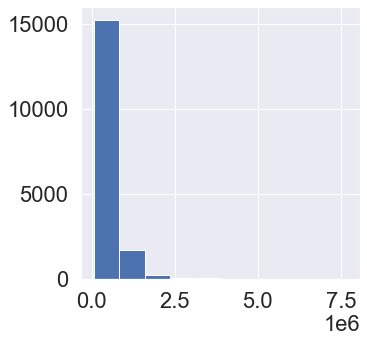

In [781]:
# plot the  target histgram
y_train.hist(figsize  = (5,5))

We can notice the target (price) positivaly skwied 

In [782]:
# take log transform for target 
# normalize the target
y_train_log = np.log(y_train)
y_train_scale = normalize(y_train_log)

<AxesSubplot:>

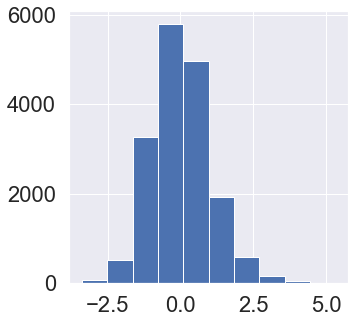

In [783]:
# visualize the scaled target (price) by using histgram
y_train_scale.hist(figsize = (5,5))

Lets make the same changes on X_test dataset.

In [784]:
# check for the continious features on X_test dataset
#X_test_conts = X_test[conts]

In [785]:
# check for the continious features on X_test dataset
X_test_conts = X_test[conts]

In [786]:
# Apply log transform for continious features on X_test.
#log_names = [f'{column}_log' for column in X_test_conts.columns]

#X_test_log = np.log(X_test_conts)
#X_test_log.columns = log_names
#X_test_log.hist(figsize=(10, 10), bins='auto')
#fig.tight_layout();

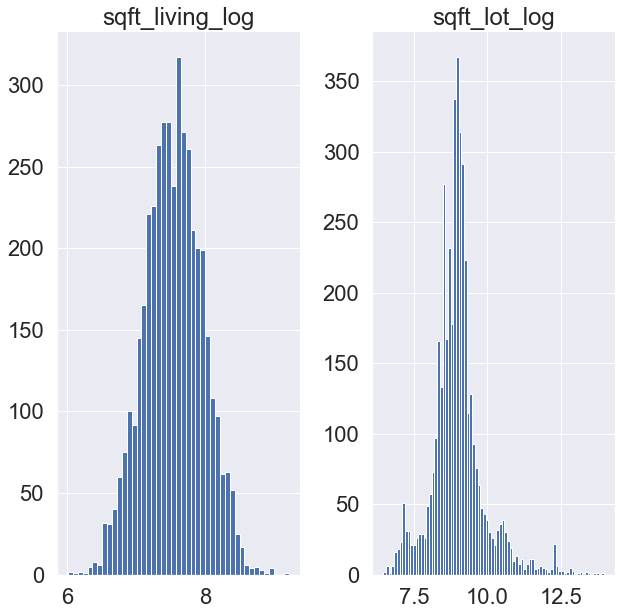

In [787]:
# Apply log transform for continious features on X_test.
log_names = [f'{column}_log' for column in X_test_conts.columns]

X_test_log = np.log(X_test_conts)
X_test_log.columns = log_names
X_test_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

In [788]:
# apply scale for the X_test
#feature_scale = X_test_log.apply(normalize)

#feature_scale.hist(figsize  = (8, 8));

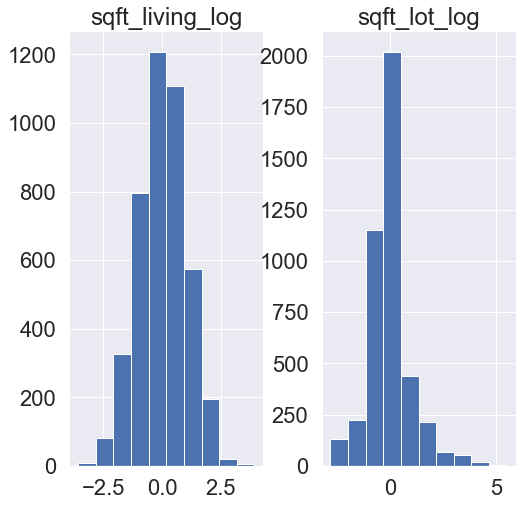

In [789]:
# apply scale for the X_test
feature_scale = X_test_log.apply(normalize)

feature_scale.hist(figsize  = (8, 8));

In [790]:
# drop the non normal distribution columns from x_test dataset.
#X_test = X_test.drop(columns = ["sqft_living","sqft_lot"],axis = 1)

In [791]:
# drop the non normal distribution columns from x_test dataset.
X_test = X_test.drop(columns = ["sqft_living","sqft_lot"],axis = 1)

We want to concatenate the new dataframe (features_scale) together with the X_test. 

In [792]:
# concat the X_test with  feature_scale by using .concat()method.
X_test = pd.concat([feature_scale,X_test],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,...,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,bathrooms_7.75,floors_1.5,floors_2.0,floors_2.5
3686,-1.870573,0.075574,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
10247,-0.523849,-0.303454,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4037,-0.125182,1.830925,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3437,-1.182603,-1.285719,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [793]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 23)

In [794]:
# apply the log transform on the target in the test data set
# apply normalize function on the target in the test data set
y_test_log = np.log(y_test)
y_test_scale = normalize(y_test_log)

<AxesSubplot:>

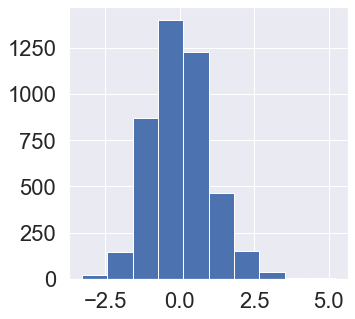

In [795]:
# plot the target after updating
y_test_scale.hist(figsize = (5,5))

#### Building and Evaluating the Thired Model
In the cell below, we use the same process to evaluate a model using X_train_third_model.

In [796]:
third_model = LinearRegression()

#### Fit the third model

In [797]:
# Fit the third model on train data set
third_model.fit(X_train_third_model, y_train_scale)

LinearRegression()

In [798]:

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6081652713582413
Validation score: 0.6115224987304327

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [799]:
# create a model intercept
X_int = sm.add_constant(X_train_third_model)
# fit the model on the train data set
model3 = sm.OLS(y_train_scale,X_int).fit()
# getting the summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1169.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:03:57   Log-Likelihood:                -16401.
No. Observations:               17277   AIC:                         3.285e+04
Df Residuals:                   17253   BIC:                         3.304e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2092      0.027     44.810      0.000       1.156       1.262
sqft_living_log         0.4295      0.009     48.764      0.000       0.412       0.447
sqft_lot_log           -0.0961      0.005    -17.898      0.000      -0.107      -0.086
waterfront_YES          1.1859      0.059     20.267      0.000       1.071       1.301
grade_11 Excellent      0.3960      0.041      9.563      0.000       0.315       0.477
grade_12 Luxury         0.8105      0.079     10.292      0.000       0.656       0.965
grade_13 Mansion        1.5627      0.200      7.806      0.000       1.170       1.955
grade_4 Low            -2.0367      0.148    -13.755      0.000      -2.327      -1.746
grade_5 Fair           -1.8738      0.055    -34.069      0.000      -1.982      -1.766
grade_6 Low Average    -1.6374      0.033    -49.673      0.000      -1.702      -1.573
grade_7 Average        -1.2914      0.026    -49.154      0.000      -1.343      -1.240
grade_8 Good           -0.8869      0.025    -36.088      0.000      -0.935      -0.839
grade_9 Better         -0.3900      0.025    -15.386      0.000      -0.440      -0.340
condition_Good          0.1347      0.012     11.631      0.000       0.112       0.157
condition_Very Good     0.3662      0.018     19.942      0.000       0.330       0.402
bedrooms_3             -0.2632      0.015    -17.366      0.000      -0.293      -0.234
bedrooms_4             -0.2901      0.018    -16.318      0.000      -0.325      -0.255
bedrooms_5             -0.2710      0.025    -11.044      0.000      -0.319      -0.223
bathrooms_2.5          -0.1521      0.013    -12.093      0.000      -0.177      -0.127
bathrooms_6.0           0.8808      0.369      2.384      0.017       0.157       1.605
bathrooms_7.75          0.9123      0.657      1.389      0.165      -0.375       2.200
floors_1.5              0.2827      0.018     16.107      0.000       0.248       0.317
floors_2.0             -0.1000      0.013     -7.720      0.000      -0.125      -0.075
floors_2.5              0.1855      0.057      3.256      0.001       0.074       0.297
==============================================================================
Omnibus:                        4.869   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                5.079
Skew:                           0.014   Prob(JB):                       0.0789
Kurtosis:                       3.079   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared:
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1. In this case , the relationship between the dependent variable and the independent variables explains 60.8% of the variation in the data.

The model summary refers to Multicollinearity in regression analysis.when two or more explanatory variables are highly correlated with each other, such that they do not provide unique or independent information in the regression model. If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model. 



#### Selecting Features with sklearn.feature_selection

We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [800]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_scale)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living_log: True
sqft_lot_log: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Good: True
condition_Very Good: True
bedrooms_3: True
bedrooms_4: True
bedrooms_5: True
bathrooms_2.5: True
bathrooms_6.0: True
bathrooms_7.75: True
floors_1.5: True
floors_2.0: True
floors_2.5: True


In [801]:
#collect the second set of bad feature
#bad_feature2 = ["grade_3 Poor","bedrooms_33","bathrooms_5.0","bathrooms_5.25",
                #"bathrooms_5.5","bathrooms_5.75","bathrooms_6.25","bathrooms_7.5","bathrooms_7.75",
                #"bathrooms_8.0","floors_3.0","floors_3.5","grade_6 Low Average","grade_7 Average",
                # "grade_8 Good","grade_9 Better"]   
                 

In [802]:
bad_feature2 = ["bathrooms_7.75"]

### Model4 :

#### Prepering the data for model4:
Removing the bad feature from the X train and X test data set 

In [803]:
# Remove the bad feature from the X train data set using .drop()method
X_train_forth_model = X_train_third_model.drop(X_train_third_model[bad_feature2]
                                                  ,axis = 1)

In [804]:
# # Remove the bad feature from the X test data set using .drop()method
X_test = X_test.drop(X_test[bad_feature2],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,...,condition_Good,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,floors_1.5,floors_2.0,floors_2.5
3686,-1.870573,0.075574,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10247,-0.523849,-0.303454,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4037,-0.125182,1.830925,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3437,-1.182603,-1.285719,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [805]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 22)

In [806]:
# # check for the X_train data set by using .shape
X_train_forth_model.shape

(17277, 22)

In [807]:
# display the top five rows of X_train_forth_model data set.
X_train_forth_model.head()

,sqft_living_log,sqft_lot_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,...,condition_Good,condition_Very Good,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2.5,bathrooms_6.0,floors_1.5,floors_2.0,floors_2.5
6243,-0.661437,-0.557527,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
8986,-0.677889,0.228192,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
9419,1.164030,-0.524875,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
10155,0.183934,-0.158236,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
10436,0.640979,-0.750483,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,1,0,0


In [808]:
# View the columns of X_train_forth_model data set
X_train_forth_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bathrooms_2.5', 'bathrooms_6.0', 'floors_1.5', 'floors_2.0',
       'floors_2.5'],
      dtype='object')

#### Building and Evaluating the forth Model
In the cell below, we use the same process to evaluate a model using X_train_forth_model.

In [809]:
forth_model = LinearRegression()

#### Fit the third model

In [810]:
# Fit the forth model on train data set
forth_model.fit(X_train_forth_model, y_train_scale)

LinearRegression()

In [811]:


forth_model_scores = cross_validate(
    estimator=forth_model,
    X=X_train_forth_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", forth_model_scores["train_score"].mean())
print("Validation score:", forth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.608133663836926
Validation score: 0.6114929754321101

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [812]:
X_int = sm.add_constant(X_train_forth_model)
model4 = sm.OLS(y_train_scale,X_int).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:04:22   Log-Likelihood:                -16402.
No. Observations:               17277   AIC:                         3.285e+04
Df Residuals:                   17254   BIC:                         3.303e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2094      0.027     44.818      0.000       1.157       1.262
sqft_living_log         0.4297      0.009     48.800      0.000       0.412       0.447
sqft_lot_log           -0.0961      0.005    -17.899      0.000      -0.107      -0.086
waterfront_YES          1.1858      0.059     20.264      0.000       1.071       1.300
grade_11 Excellent      0.3959      0.041      9.561      0.000       0.315       0.477
grade_12 Luxury         0.8103      0.079     10.290      0.000       0.656       0.965
grade_13 Mansion        1.6457      0.191      8.613      0.000       1.271       2.020
grade_4 Low            -2.0363      0.148    -13.752      0.000      -2.327      -1.746
grade_5 Fair           -1.8735      0.055    -34.062      0.000      -1.981      -1.766
grade_6 Low Average    -1.6371      0.033    -49.663      0.000      -1.702      -1.572
grade_7 Average        -1.2912      0.026    -49.144      0.000      -1.343      -1.240
grade_8 Good           -0.8867      0.025    -36.080      0.000      -0.935      -0.839
grade_9 Better         -0.3899      0.025    -15.382      0.000      -0.440      -0.340
condition_Good          0.1347      0.012     11.627      0.000       0.112       0.157
condition_Very Good     0.3662      0.018     19.941      0.000       0.330       0.402
bedrooms_3             -0.2636      0.015    -17.395      0.000      -0.293      -0.234
bedrooms_4             -0.2906      0.018    -16.354      0.000      -0.325      -0.256
bedrooms_5             -0.2719      0.025    -11.086      0.000      -0.320      -0.224
bathrooms_2.5          -0.1522      0.013    -12.099      0.000      -0.177      -0.128
bathrooms_6.0           0.8806      0.369      2.384      0.017       0.156       1.605
floors_1.5              0.2828      0.018     16.108      0.000       0.248       0.317
floors_2.0             -0.1000      0.013     -7.714      0.000      -0.125      -0.075
floors_2.5              0.1835      0.057      3.221      0.001       0.072       0.295
==============================================================================
Omnibus:                        4.818   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                5.024
Skew:                           0.014   Prob(JB):                       0.0811
Kurtosis:                       3.078   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [813]:
#def find_outliers_IQR(df):

  # q1=df.quantile(0.25)

   #q3=df.quantile(0.75)

   #IQR=q3-q1

   #outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   #return outliers

In [814]:
#outliers = find_outliers_IQR (X_train_forth_model)

#print("number of outliers: "+ str(len(outliers)))

#print("max outlier value: "+ str(outliers.max()))

#print("min outlier value: "+ str(outliers.min()))

#outliers

Now, we prepare the data for modeling:

In [815]:
X_train_final_model = X_train_forth_model
X_test_final = X_test

In [816]:
X_train_final_model.shape

(17277, 22)

In [817]:
X_test_final.shape

(4320, 22)

In the cell below, instantiate a LinearRegression model called final_model, then fit it on the training data and score it on the test data.

In [818]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test_scale,forth_model.predict(X_test_final), squared=False)

0.6326476113805272

This means that for an average house set, this algorithm will be off by about $63. 

Given that most house sets sell for less than $100, we would definitely want to have a human double-check and adjust these prices rather than just allowing the algorithm to set them.

##### 5. Interpret the Final Model
Below, we display the coefficients and intercept for the final model:

In [819]:
print(pd.Series(forth_model.coef_, index=X_train_final_model.columns, name="Coefficients"))
print()
print("Intercept:", forth_model.intercept_)

sqft_living_log        0.429728
sqft_lot_log          -0.096082
waterfront_YES         1.185798
grade_11 Excellent     0.395921
grade_12 Luxury        0.810347
grade_13 Mansion       1.645731
grade_4 Low           -2.036313
grade_5 Fair          -1.873491
grade_6 Low Average   -1.637096
grade_7 Average       -1.291162
grade_8 Good          -0.886670
grade_9 Better        -0.389907
condition_Good         0.134669
condition_Very Good    0.366209
bedrooms_3            -0.263616
bedrooms_4            -0.290632
bedrooms_5            -0.271950
bathrooms_2.5         -0.152205
bathrooms_6.0          0.880611
floors_1.5             0.282752
floors_2.0            -0.099958
floors_2.5             0.183491
Name: Coefficients, dtype: float64

Intercept: 1.2094081269182595


According to our final model,We got some houses features impact the house's price posatibvally .That mean if these features provided  the houses prices increased.


waterfront_YES         1.185798
grade_11 Excellent     0.395921
grade_12 Luxury        0.810347
grade_13 Mansion       1.645731
condition_Good         0.134669
condition_Very Good    0.366209
bathrooms_6.0          0.880611
floors_1.5             0.282752
floors_2.5             0.183491

###### Both dependent/response variable and independent/predictor variable(s) are log-transformed.

Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable
sqft_living_log coefficient = 0.561441 For every 1% increase in the independent variable, our dependent variable increases by about 0.20%
For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100
(1.20  0.561 – 1) * 100 = 1.1 .
For every 20% increase in the independent variable, our dependent variable increases by about 1.1 percent


#### Linear regression assumptions

We should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

##### Linearity
First, let's check whether the linearity assumption holds.

No handles with labels found to put in legend.


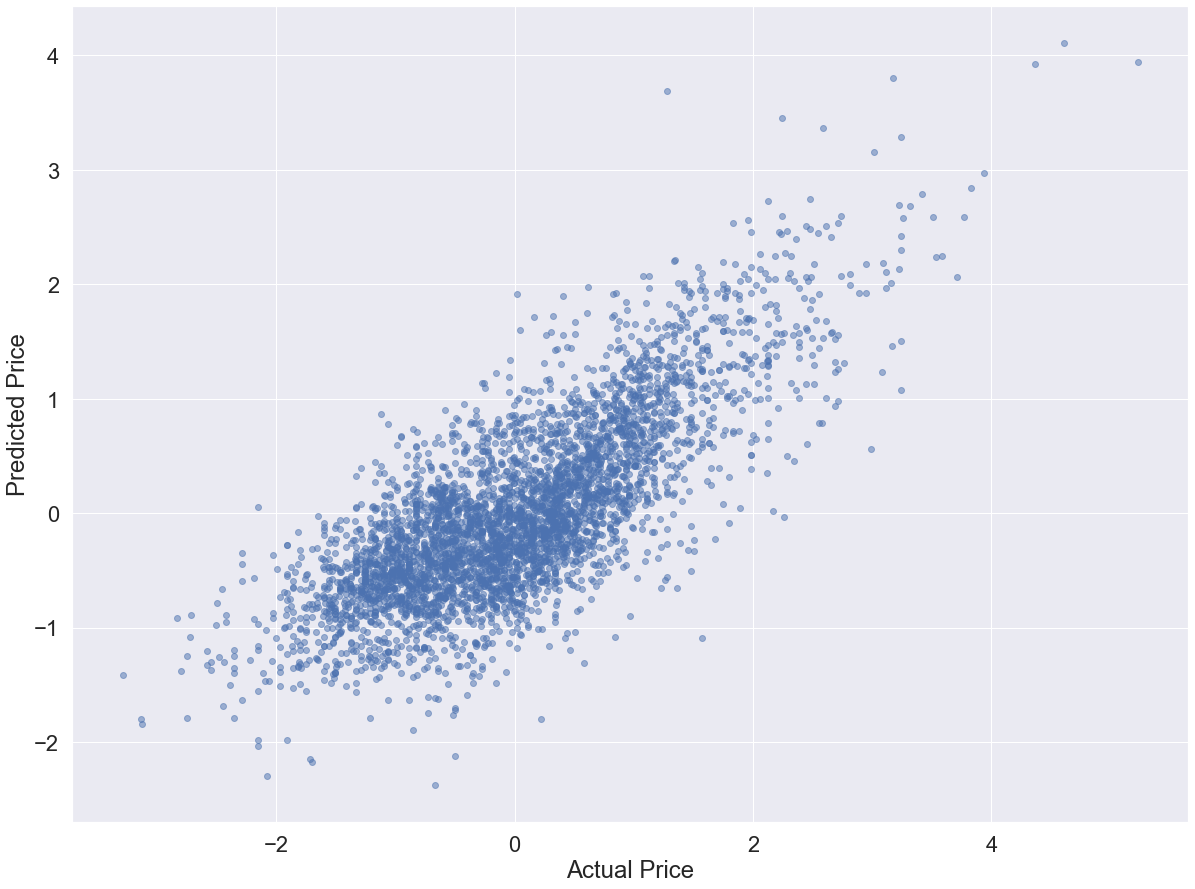

In [556]:
preds = forth_model.predict(X_test_final)
fig, ax = plt.subplots(figsize=(20,15))

perfect_line = np.arange(y_test_scale.min()/100000, y_test_scale.max()/100000)
#ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test_scale, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

##### Normality
Now let's check whether the normality assumption holds for our model.

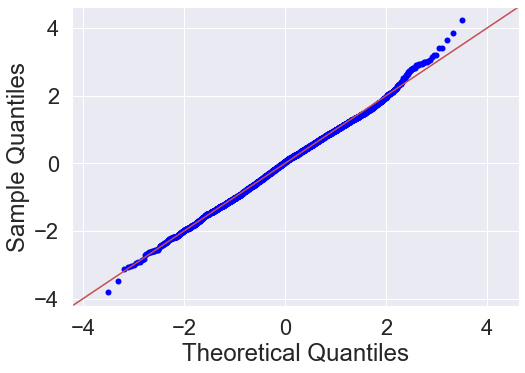

In [557]:
import scipy.stats as stats
residuals = (y_test_scale - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

 We are holding the normality assumption

##### Investigating Multicollinearity (Independence Assumption)
Another way to measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [558]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender

# the independent variables set
X = X_train_forth_model
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)


                feature       VIF
0       sqft_living_log  3.382388
1          sqft_lot_log  1.269355
2        waterfront_YES  1.028154
3    grade_11 Excellent  1.173246
4       grade_12 Luxury  1.100165
5      grade_13 Mansion  1.019191
6           grade_4 Low  1.024393
7          grade_5 Fair  1.172978
8   grade_6 Low Average  2.098304
9       grade_7 Average  4.650714
10         grade_8 Good  3.033517
11       grade_9 Better  1.887861
12       condition_Good  1.533026
13  condition_Very Good  1.180531
14           bedrooms_3  3.919314
15           bedrooms_4  3.917609
16           bedrooms_5  1.830538
17        bathrooms_2.5  1.746998
18        bathrooms_6.0  1.045873
19           floors_1.5  1.203670
20           floors_2.0  2.562525
21           floors_2.5  1.044550


We are below 5 for all features in the final model, so we don't have too high of multicollinearity

##### Homoscedasticity
Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

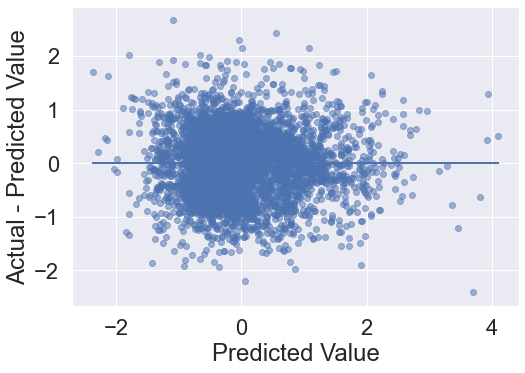

In [559]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

We are holding Homoscedasticity

Our confidence in these coefficients should not be too high, since we are violating or close to violating more than one of the assumptions of linear regression. This really only should be used for predictive purposes.

### Conclusions
The homeowners can increase  their home's prices by improving some features on thier home 

1- Improve the condition of the house :
The first step is identifying any conditions that affect the stability and safety of the home and keeping the home clean as much as possible by performing a rotin maintanance like
Repairing faulty plumbing ,Replacing a leaky roof,Updating electrical and air 
Fixing foundation issues (e.g., cracks and uneven floors)


2-Improve the square footage of interior housing living space:
  While it’s possible to gain additional living space by expantion the main    floor or add a new floor both choices are a great way to enlarge a bedroom or add new floor space for general use. 

in three different methods: improving the grade of the home with some form of renovation, expanding the living square feet, and improving the condition.

Items to improve the grade of a home include: updating plumbing systems, adding wood finishes, upgrading counter tops to something like marble or quartz, adding/redoing insulation, etc.

